In [335]:
# Import Libraries and Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import os



### 1. Combine and Clean the Data
#### Import CSVs

In [336]:
# Read the CSV files into DataFrames.

athletes_2020_df = pd.read_csv('./Resources/athletic_sales_2020.csv')

athletes_2021_df = pd.read_csv('./Resources/athletic_sales_2021.csv')

In [337]:
# Display the 2020 sales DataFrame

athletes_2020_df.head()

,retailer,retailer_id,invoice_date,region,state,city,product,price_per_unit,units_sold,total_sales,operating_profit,sales_method
0,Foot Locker,1185732,1/1/20,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000.00,In-store
1,Foot Locker,1185732,1/1/20,Northeast,Pennsylvania,Philadelphia,Women's Apparel,68,83,5644,2426.92,Online
2,Foot Locker,1185732,1/1/20,Northeast,Pennsylvania,Philadelphia,Women's Apparel,75,275,206250,61875.00,Outlet
3,Foot Locker,1185732,1/1/20,Northeast,New York,New York,Men's Street Footwear,34,384,13056,6789.12,Outlet
4,Foot Locker,1185732,1/1/20,Northeast,Pennsylvania,Philadelphia,Women's Apparel,53,83,4399,1407.68,Outlet


In [338]:
# Display the 2021 sales DataFrame
athletes_2021_df.head()

,retailer,retailer_id,invoice_date,region,state,city,product,price_per_unit,units_sold,total_sales,operating_profit,sales_method
0,West Gear,1128299,1/1/21,West,California,San Francisco,Men's Athletic Footwear,65,750,487500,121875.00,Outlet
1,West Gear,1128299,1/1/21,West,California,San Francisco,Men's Athletic Footwear,51,233,11883,3208.41,Outlet
2,Kohl's,1189833,1/1/21,Midwest,Montana,Billings,Men's Apparel,50,275,137500,82500.00,Outlet
3,Kohl's,1189833,1/1/21,Midwest,Montana,Billings,Men's Apparel,47,77,3619,2714.25,Online
4,West Gear,1128299,1/1/21,West,California,San Francisco,Men's Athletic Footwear,64,225,14400,5184.00,Online


#### Check the data types of each DataFrame

In [339]:
# Check the 2020 sales data types.

athletes_2020_df.dtypes

retailer             object
retailer_id           int64
invoice_date         object
region               object
state                object
city                 object
product              object
price_per_unit        int64
units_sold            int64
total_sales           int64
operating_profit    float64
sales_method         object
dtype: object

In [340]:
# Check the 2021 sales data types.
athletes_2021_df.dtypes

retailer             object
retailer_id           int64
invoice_date         object
region               object
state                object
city                 object
product              object
price_per_unit        int64
units_sold            int64
total_sales           int64
operating_profit    float64
sales_method         object
dtype: object

#### Combine the sales data by rows.

In [341]:
# Combine the 2020 and 2021 sales DataFrames on the rows and reset the index.

# Combine the two DataFrames by rows (since they have the same columns & data types)
combined_df = pd.concat([athletes_2020_df, athletes_2021_df], axis=0, join='inner')

# Reset the index
combined_df.reset_index(drop=True, inplace=True)

# Display the combined DataFrame
combined_df.head()


,retailer,retailer_id,invoice_date,region,state,city,product,price_per_unit,units_sold,total_sales,operating_profit,sales_method
0,Foot Locker,1185732,1/1/20,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000.00,In-store
1,Foot Locker,1185732,1/1/20,Northeast,Pennsylvania,Philadelphia,Women's Apparel,68,83,5644,2426.92,Online
2,Foot Locker,1185732,1/1/20,Northeast,Pennsylvania,Philadelphia,Women's Apparel,75,275,206250,61875.00,Outlet
3,Foot Locker,1185732,1/1/20,Northeast,New York,New York,Men's Street Footwear,34,384,13056,6789.12,Outlet
4,Foot Locker,1185732,1/1/20,Northeast,Pennsylvania,Philadelphia,Women's Apparel,53,83,4399,1407.68,Outlet


In [342]:
# Check if any values are null.

combined_df.isnull().sum()

retailer            0
retailer_id         0
invoice_date        0
region              0
state               0
city                0
product             0
price_per_unit      0
units_sold          0
total_sales         0
operating_profit    0
sales_method        0
dtype: int64

In [343]:
# Check the data type of each column

combined_df.dtypes

retailer             object
retailer_id           int64
invoice_date         object
region               object
state                object
city                 object
product              object
price_per_unit        int64
units_sold            int64
total_sales           int64
operating_profit    float64
sales_method         object
dtype: object

In [344]:
# Convert the "invoice_date" to a datetime datatype
# Specify a format for invoice_date (example: YYYY-MM-DD)

combined_df['invoice_date'] = pd.to_datetime(combined_df['invoice_date'])


/var/folders/gg/vmh0mv_j5b90pkytkpd35k940000gn/T/ipykernel_14048/1917618557.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['invoice_date'] = pd.to_datetime(combined_df['invoice_date'])


In [345]:
print(combined_df.shape)
print(athletes_2020_df.shape)
print(athletes_2021_df.shape)

(9643, 12)
(1297, 12)
(8346, 12)


In [346]:
# Confirm that the "invoice_date" data type has been changed.

combined_df.dtypes

retailer                    object
retailer_id                  int64
invoice_date        datetime64[ns]
region                      object
state                       object
city                        object
product                     object
price_per_unit               int64
units_sold                   int64
total_sales                  int64
operating_profit           float64
sales_method                object
dtype: object

### 2. Determine which Region Sold the Most Products

#### Using `groupby`

In [347]:
# Show the number products sold for region, state, and city.
# Rename the sum to "Total_Products_Sold".

# Use groupby to sum units sold, grouped by region, state, and city
grouped_df = combined_df.groupby(['region', 'state', 'city'])['units_sold'].sum().reset_index()

# Rename the column 'units_sold' to 'Total_Products_Sold'
grouped_df = grouped_df.rename(columns={'units_sold': 'Total_Products_Sold'})

# Sort the results in descending order by 'Total_Products_Sold'
sorted_df = grouped_df.sort_values(by='Total_Products_Sold', ascending=False)

# Display the top 5 regions, states, and cities with the greatest number of products sold
sorted_df.head()



,region,state,city,Total_Products_Sold
21,Northeast,New York,New York,111954
33,South,Texas,Houston,90322
44,West,California,San Francisco,85478
43,West,California,Los Angeles,76384
34,Southeast,Florida,Miami,73135


#### Using `pivot_table`

In [348]:
# Create a pivot table to show the number of products sold for each region, state, and city

# Use pivot_table to sum units sold, grouped by region, state, and city
pivot_df = combined_df.pivot_table(
    index=['region', 'state', 'city'],
    values='units_sold',
    aggfunc='sum'
).reset_index()

# Rename the 'units_sold' column to 'Total_Products_Sold'
pivot_df = pivot_df.rename(columns={'units_sold': 'Total_Products_Sold'})

# Sort the results in descending order by 'Total_Products_Sold'
sorted_pivot_df = pivot_df.sort_values(by='Total_Products_Sold', ascending=False)

# Display the top 5 regions, states, and cities with the greatest number of products sold
sorted_pivot_df.head()





,region,state,city,Total_Products_Sold
21,Northeast,New York,New York,111954
33,South,Texas,Houston,90322
44,West,California,San Francisco,85478
43,West,California,Los Angeles,76384
34,Southeast,Florida,Miami,73135


### 3. Determine which Region had the Most Sales

#### Using `groupby`

In [349]:
# Show the total sales for the products sold for each region, state, and city.
# Rename the "total_sales" column to "Total Sales"

# Use groupby to sum total_sales, grouped by region, state, and city
grouped_df = combined_df.groupby(['region', 'state', 'city'])['total_sales'].sum().reset_index()

# Rename the column 'total_sales' to 'Total_Sales'
grouped_df = grouped_df.rename(columns={'total_sales': 'Total_Sales'})

# Sort the results in descending order by 'Total_Sales'
sorted_df = grouped_df.sort_values(by='Total_Sales', ascending=False)

# Display the top 5 regions, states, and cities with the most sales
top_5_sales = sorted_df.head()

top_5_sales




,region,state,city,Total_Sales
21,Northeast,New York,New York,39801235
44,West,California,San Francisco,33973228
34,Southeast,Florida,Miami,31600863
39,Southeast,South Carolina,Charleston,29285637
35,Southeast,Florida,Orlando,27682851


#### Using `pivot_table`

In [350]:
# Show the total sales for the products sold for each region, state, and city.


# Use pivot_table to sum total_sales, grouped by region, state, and city
pivot_df = combined_df.pivot_table(
    index=['region', 'state', 'city'],
    values='total_sales',
    aggfunc='sum'
).reset_index()

# Rename the 'total_sales' column to 'Total_Sales'
pivot_df = pivot_df.rename(columns={'total_sales': 'Total_Sales'})

# Sort the results in descending order by 'Total_Sales'
sorted_pivot_df = pivot_df.sort_values(by='Total_Sales', ascending=False)

# Display the top 5 regions, states, and cities with the most sales
top_5_sales = sorted_pivot_df.head()

top_5_sales


,region,state,city,Total_Sales
21,Northeast,New York,New York,39801235
44,West,California,San Francisco,33973228
34,Southeast,Florida,Miami,31600863
39,Southeast,South Carolina,Charleston,29285637
35,Southeast,Florida,Orlando,27682851


### 4. Determine which Retailer had the Most Sales

#### Using `groupby`

In [351]:
# Show the total sales for the products sold for each retailer, region, state, and city.
# Rename the "total_sales" column to "Total Sales"

# Use groupby to sum total_sales, grouped by retailer, region, state, and city
grouped_df = combined_df.groupby(['retailer', 'region', 'state', 'city'])['total_sales'].sum().reset_index()

# Rename the 'total_sales' column to 'Total_Sales'
grouped_df = grouped_df.rename(columns={'total_sales': 'Total_Sales'})

# Sort the results in descending order by 'Total_Sales'
sorted_df = grouped_df.sort_values(by='Total_Sales', ascending=False)

# Display the top 5 retailers, regions, states, and cities with the most sales
top_5_sales = sorted_df.head()

top_5_sales



,retailer,region,state,city,Total_Sales
103,West Gear,West,California,San Francisco,32794405
50,Kohl's,West,California,Los Angeles,25127160
22,Foot Locker,Northeast,New York,New York,25008568
109,West Gear,West,Washington,Seattle,24862675
33,Foot Locker,Southeast,South Carolina,Charleston,24822280


#### Using `pivot_table`

In [352]:
# Show the total sales for the products sold for each retailer, region, state, and city.

# Use pivot_table to sum total_sales, grouped by retailer, region, state, and city
pivot_df = combined_df.pivot_table(
    index=['retailer', 'region', 'state', 'city'],
    values='total_sales',
    aggfunc='sum'
).reset_index()

# Rename the 'total_sales' column to 'Total_Sales'
pivot_df = pivot_df.rename(columns={'total_sales': 'Total_Sales'})

# Sort the results in descending order by 'Total_Sales'
sorted_pivot_df = pivot_df.sort_values(by='Total_Sales', ascending=False)

# Display the top 5 retailers, regions, states, and cities with the most sales
top_5_sales_pivot = sorted_pivot_df.head()

top_5_sales_pivot



,retailer,region,state,city,Total_Sales
103,West Gear,West,California,San Francisco,32794405
50,Kohl's,West,California,Los Angeles,25127160
22,Foot Locker,Northeast,New York,New York,25008568
109,West Gear,West,Washington,Seattle,24862675
33,Foot Locker,Southeast,South Carolina,Charleston,24822280


### 5. Determine which Retailer Sold the Most Women's Athletic Footwear

In [353]:
# Filter the DataFrame for Women's Athletic Footwear
women_footwear_sales_df = combined_df[combined_df['product'] == "Women's Athletic Footwear"]

# Show the top 5 results.

women_footwear_sales_df.head()


,retailer,retailer_id,invoice_date,region,state,city,product,price_per_unit,units_sold,total_sales,operating_profit,sales_method
21,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,36,281,10116,3742.92,Outlet
22,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,41,247,10127,4658.42,Online
23,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45,850,382500,133875.00,In-store
26,West Gear,1128299,2020-01-05,Northeast,Pennsylvania,Philadelphia,Women's Athletic Footwear,45,300,135000,47250.00,Outlet
27,West Gear,1128299,2020-01-05,Northeast,Pennsylvania,Philadelphia,Women's Athletic Footwear,34,90,3060,1254.60,Outlet


#### Using `groupby`

In [354]:
# Use groupby to show the total number of women's athletic footwear sold for each retailer, region, state, and city
grouped_footwear_df = women_footwear_sales_df.groupby(['retailer', 'region', 'state', 'city'])['units_sold'].sum().reset_index()

# Rename the "units_sold" column to "Womens_Footwear_Units_Sold"
grouped_footwear_df = grouped_footwear_df.rename(columns={'units_sold': 'Womens_Footwear_Units_Sold'})

# Sort the results in descending order by 'Womens_Footwear_Units_Sold'
sorted_footwear_df = grouped_footwear_df.sort_values(by='Womens_Footwear_Units_Sold', ascending=False)

# Display the top 5 retailers, regions, states, and cities with the most women's athletic footwear sales
top_5_womens_footwear_sales = sorted_footwear_df.head()

# Show the results
top_5_womens_footwear_sales




,retailer,region,state,city,Womens_Footwear_Units_Sold
101,West Gear,West,California,San Francisco,12107
22,Foot Locker,Northeast,New York,New York,10996
49,Kohl's,West,California,Los Angeles,10826
33,Foot Locker,Southeast,South Carolina,Charleston,8814
68,Sports Direct,South,Texas,Dallas,8790


#### Using `pivot_table`

In [355]:
# Show the total number of women's athletic footwear sold for each retailer, region, state, and city.
# Use pivot_table to show the total number of women's athletic footwear sold for each retailer, region, state, and city

pivot_footwear_df = women_footwear_sales_df.pivot_table(
    index=['retailer', 'region', 'state', 'city'],
    values='units_sold',
    aggfunc='sum'
).reset_index()

# Rename the "units_sold" column to "Womens_Footwear_Units_Sold"
pivot_footwear_df = pivot_footwear_df.rename(columns={'units_sold': 'Womens_Footwear_Units_Sold'})

# Sort the results in descending order by 'Womens_Footwear_Units_Sold'
sorted_pivot_footwear_df = pivot_footwear_df.sort_values(by='Womens_Footwear_Units_Sold', ascending=False)

# Show the top 5 results
top_5_womens_footwear_sales_pivot = sorted_pivot_footwear_df.head()

# Display the results
top_5_womens_footwear_sales_pivot



,retailer,region,state,city,Womens_Footwear_Units_Sold
101,West Gear,West,California,San Francisco,12107
22,Foot Locker,Northeast,New York,New York,10996
49,Kohl's,West,California,Los Angeles,10826
33,Foot Locker,Southeast,South Carolina,Charleston,8814
68,Sports Direct,South,Texas,Dallas,8790


### 6. Determine the Day with the Most Women's Athletic Footwear Sales

In [356]:
combined_df.dtypes


retailer                    object
retailer_id                  int64
invoice_date        datetime64[ns]
region                      object
state                       object
city                        object
product                     object
price_per_unit               int64
units_sold                   int64
total_sales                  int64
operating_profit           float64
sales_method                object
dtype: object

In [357]:
# Filter the combined DataFrame for Women's Athletic Footwear sales data
women_footwear_sales_df = combined_df[combined_df['product'].str.contains("Women's Athletic Footwear", case=False, na=False)]

# Create a pivot table with 'invoice_date' as the index and 'total_sales' as the values
pivot_sales_df = women_footwear_sales_df.pivot_table(
    index='invoice_date',
    values='total_sales',
    aggfunc='sum'
)

# Optional: Rename the aggregated column to 'Total_Sales'
pivot_sales_df = pivot_sales_df.rename(columns={'total_sales': 'Total_Sales'})

# Resample the data to get total sales per day (resample by day 'D')
daily_sales_df = pivot_sales_df.resample('D').sum()

# Sort the resampled DataFrame by 'Total_Sales'
sorted_daily_sales_df = daily_sales_df.sort_values(by='Total_Sales', ascending=False)

# Display the top 10 days with the most women's athletic footwear sales
top_10_sales_days = sorted_daily_sales_df.head(10)

# Show the result
print(top_10_sales_days)



              Total_Sales
invoice_date             
2021-07-16        1521825
2021-12-16        1473497
2021-06-17        1376988
2021-08-17        1086294
2021-07-23        1021806
2021-11-17        1021145
2021-12-09         915011
2021-06-24         884238
2021-07-09         869054
2021-08-10         839120


### 7.  Determine the Week with the Most Women's Athletic Footwear Sales

In [358]:
# Resample the pivot table to place the data into weekly bins and get total sales for each week
weekly_sales_df = pivot_sales_df.resample('W').sum()

# Dynamically reference the correct column for sorting
sorted_weekly_sales_df = weekly_sales_df.sort_values(by=weekly_sales_df.columns[0], ascending=False)

# Display the top 10 weeks with the most women's athletic footwear sales
top_10_weekly_sales = sorted_weekly_sales_df.head(10)

# Show the result
top_10_weekly_sales



,Total_Sales
invoice_date,
2021-12-19,3098970
2021-12-12,2922161
2021-07-11,2835078
2021-07-18,2801449
2021-11-14,2531721
2021-08-22,2491259
2021-08-15,2463941
2021-11-21,2449537
2021-05-16,2422132


# 1. Visualization for the Top 10 Days with the Most Women's Athletic Footwear Sales
# 2. Visualization for the Top 10 Weeks with the Most Women's Athletic Footwear Sales
# 3. General Sales Trend Over Time
# 4. Comparison of Sales Across Different Retailers
# 5. Retailer vs. Sales Method Distribution
# 6. Operating Profit vs. Total Sales by Region
# 7. Price per Unit Distribution Across Different Cities
# 8. Top Products Sold by Retailer
# 9. Sales Trend by Region

/var/folders/gg/vmh0mv_j5b90pkytkpd35k940000gn/T/ipykernel_14048/2775348790.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_sales_days.index.strftime('%Y-%m-%d'), y=top_10_sales_days['Total_Sales'], palette="Blues_d")


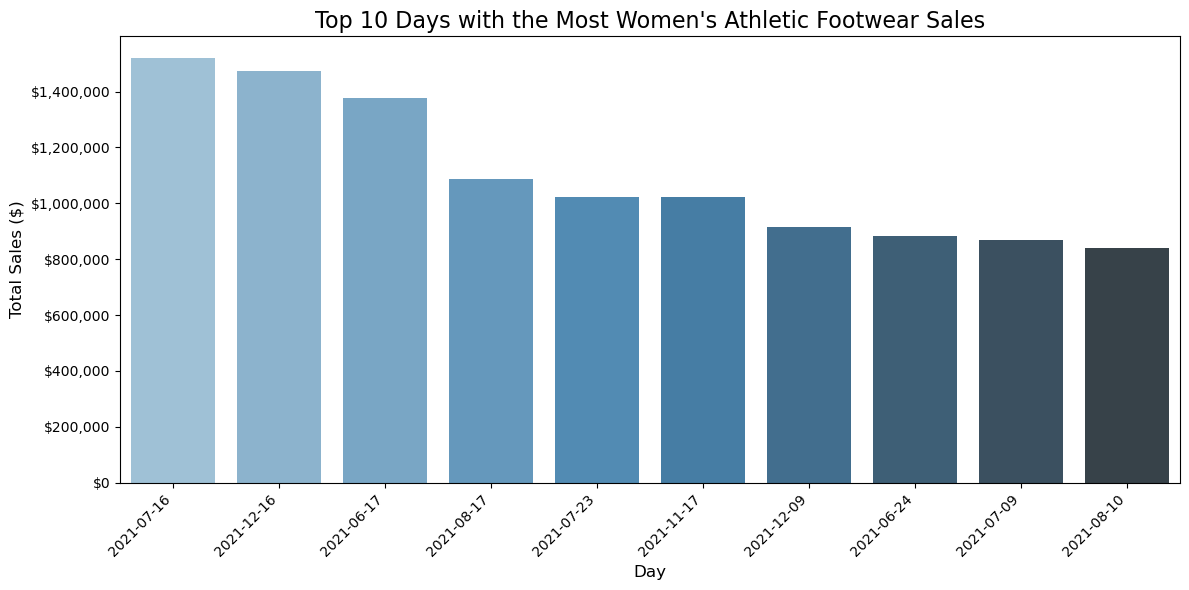

/var/folders/gg/vmh0mv_j5b90pkytkpd35k940000gn/T/ipykernel_14048/2775348790.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_weekly_sales.index.strftime('%Y-%U'), y=top_10_weekly_sales['Total_Sales'], palette="Greens_d")


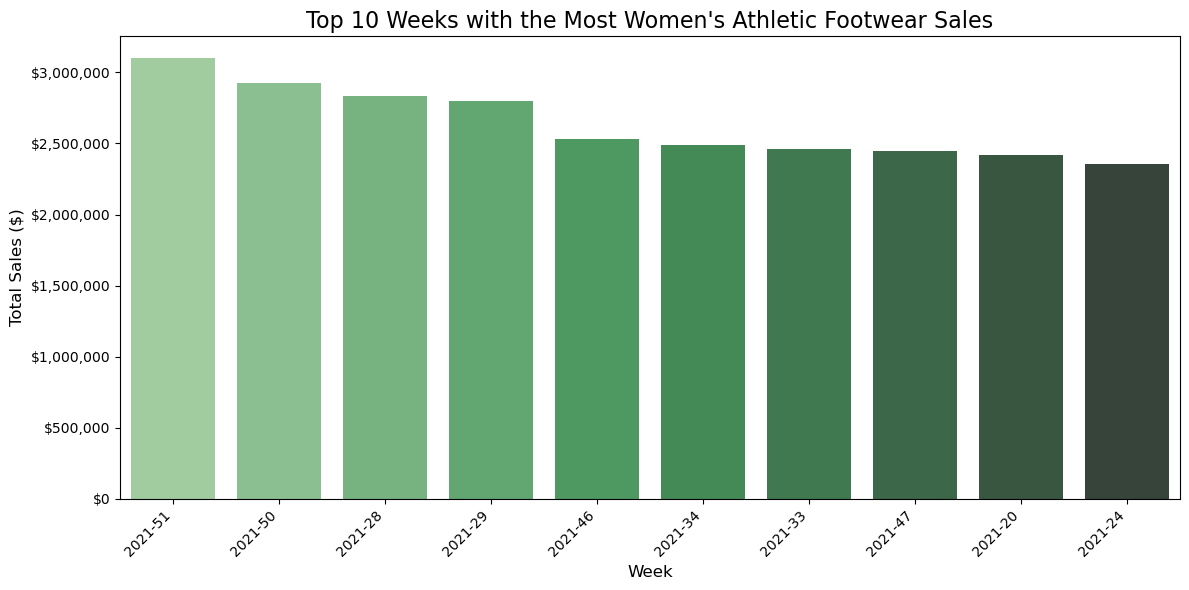

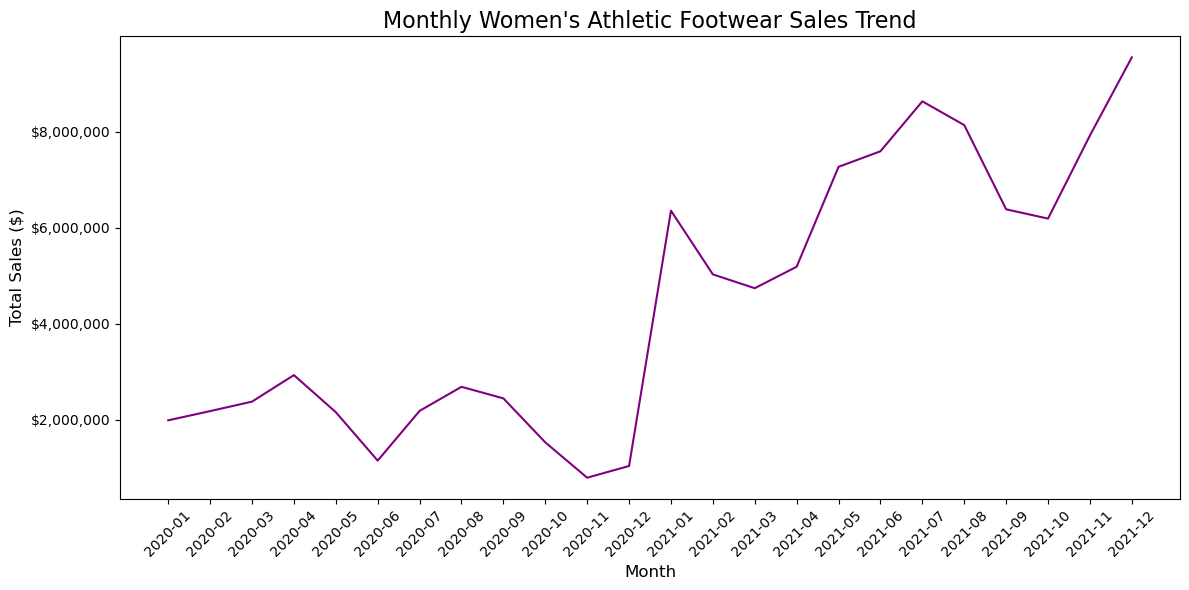

/var/folders/gg/vmh0mv_j5b90pkytkpd35k940000gn/T/ipykernel_14048/2775348790.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='retailer', y='total_sales', data=combined_df, palette="coolwarm")


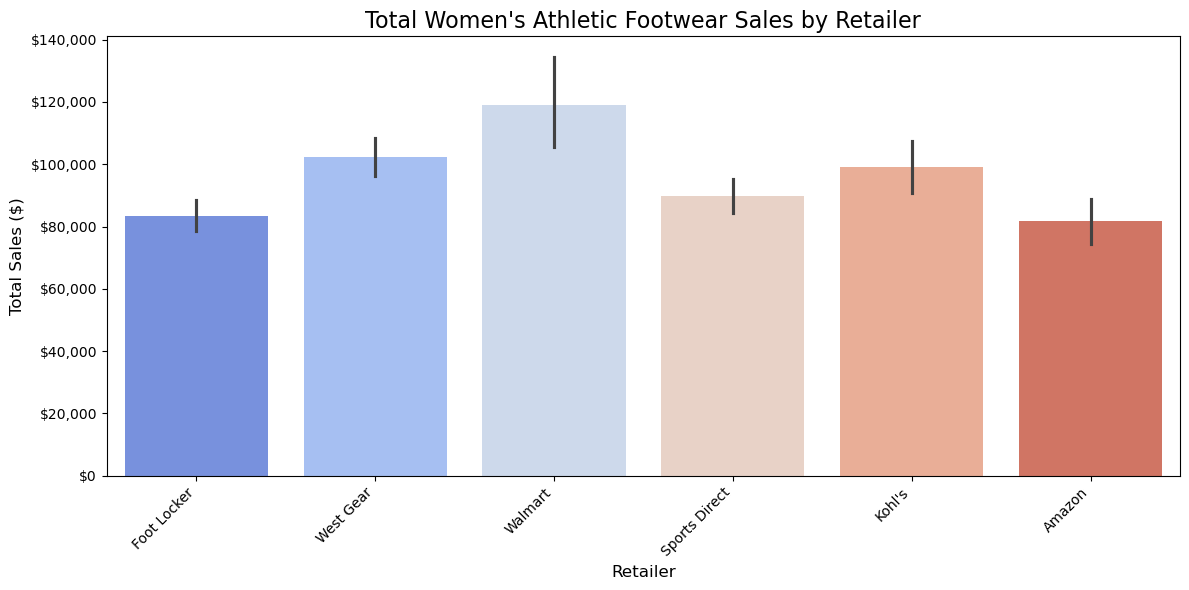

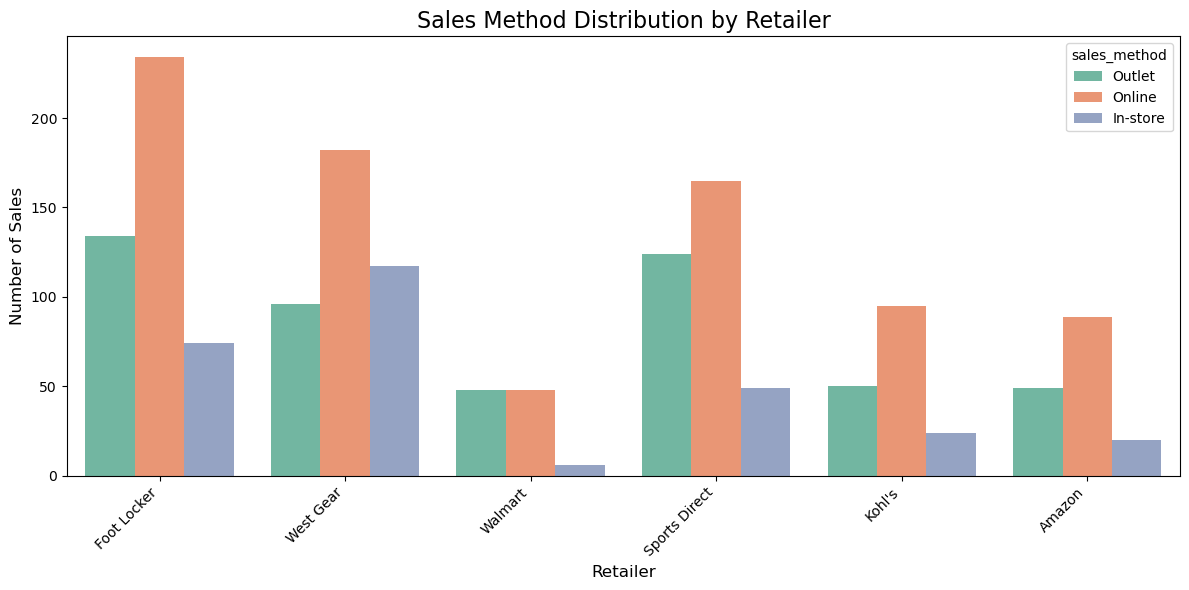

/var/folders/gg/vmh0mv_j5b90pkytkpd35k940000gn/T/ipykernel_14048/2775348790.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='region', y='operating_profit', data=profit_by_region, palette="Spectral")


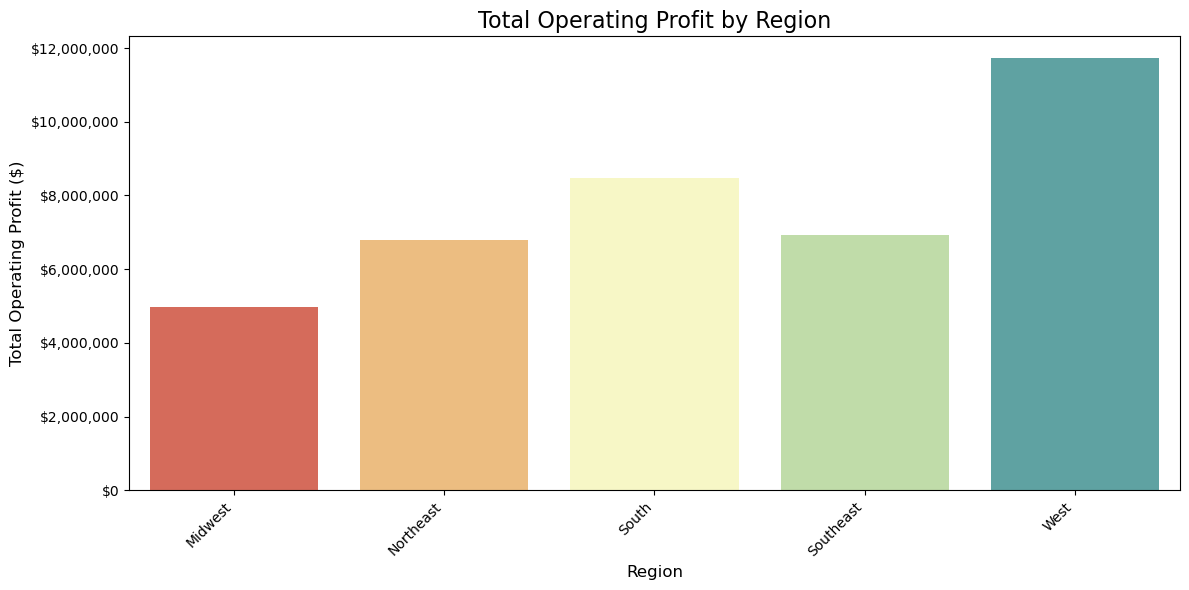

/var/folders/gg/vmh0mv_j5b90pkytkpd35k940000gn/T/ipykernel_14048/2775348790.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='city', y='price_per_unit', data=top_15_cities_df, palette="coolwarm")


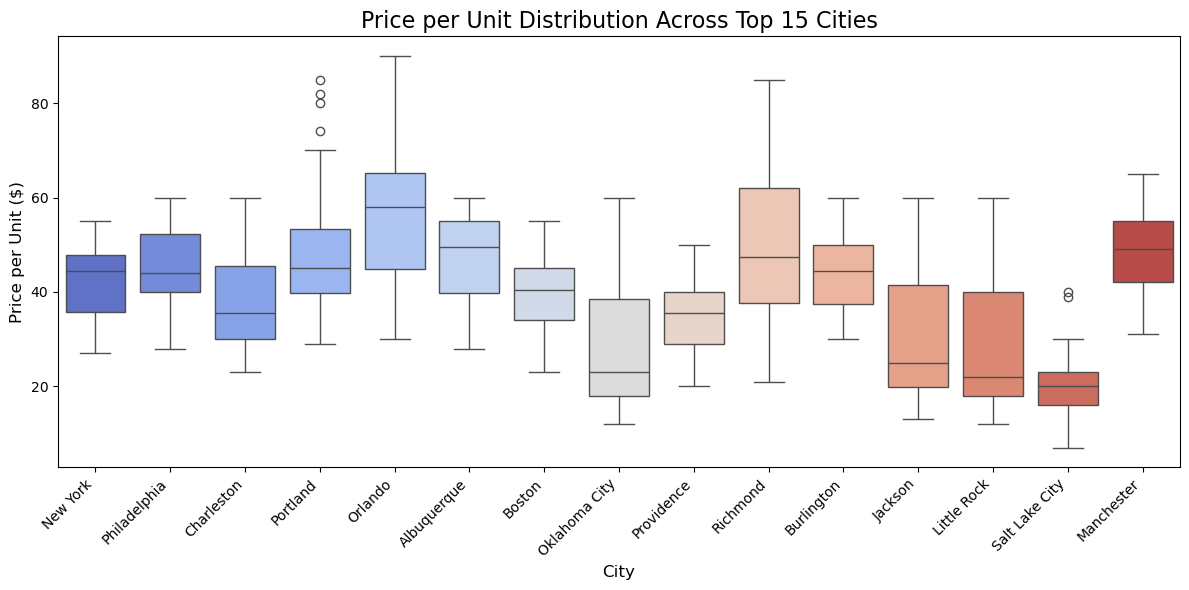

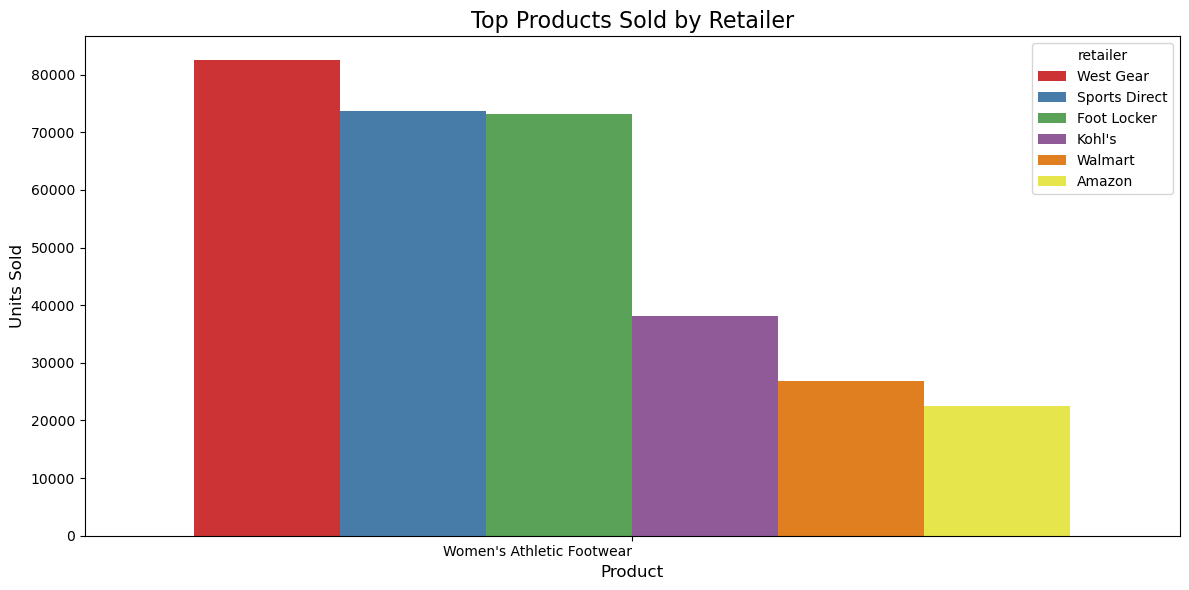

/var/folders/gg/vmh0mv_j5b90pkytkpd35k940000gn/T/ipykernel_14048/2775348790.py:103: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales_by_region = women_footwear_sales_df.groupby(['region', pd.Grouper(key='invoice_date', freq='M')])['total_sales'].sum().reset_index()


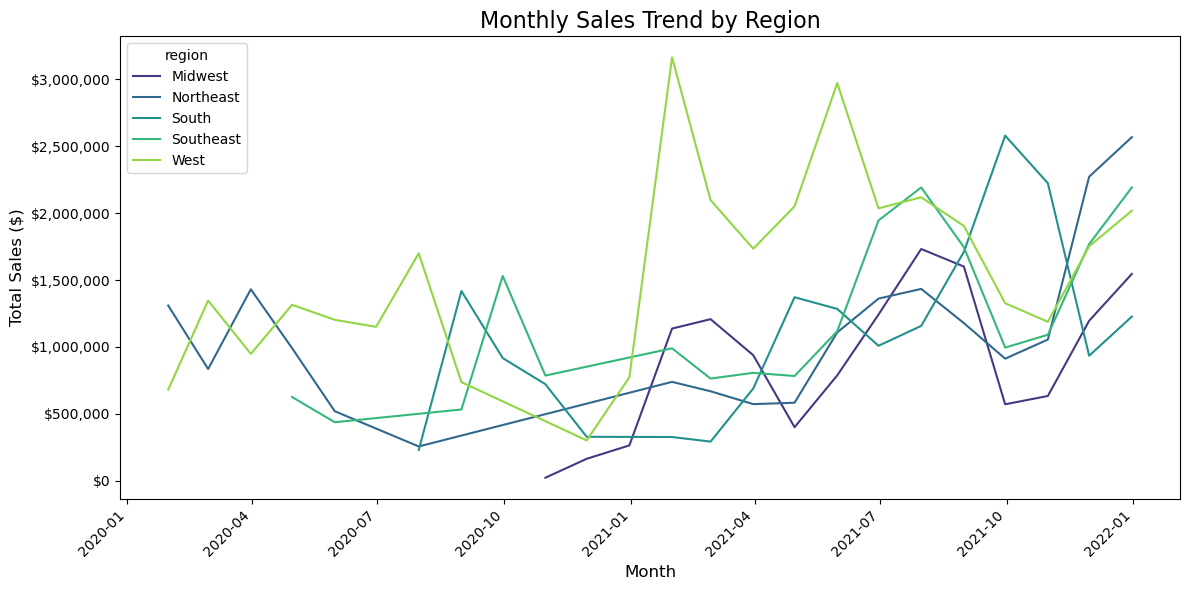

In [359]:

# 1. Bar plot for the top 10 days with the most women's athletic footwear sales
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_sales_days.index.strftime('%Y-%m-%d'), y=top_10_sales_days['Total_Sales'], palette="Blues_d")
plt.title('Top 10 Days with the Most Women\'s Athletic Footwear Sales', fontsize=16)
plt.xlabel('Day', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.xticks(rotation=45, ha='right')
ax = plt.gca()
ax.get_yaxis().set_major_formatter(FuncFormatter(lambda x, _: f'${x:,.0f}'))
plt.tight_layout()
plt.savefig('top_10_days_sales.png')  # Save the plot before showing it
plt.show()

# 2. Bar plot for the top 10 weeks with the most women's athletic footwear sales
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_weekly_sales.index.strftime('%Y-%U'), y=top_10_weekly_sales['Total_Sales'], palette="Greens_d")
plt.title('Top 10 Weeks with the Most Women\'s Athletic Footwear Sales', fontsize=16)
plt.xlabel('Week', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.xticks(rotation=45, ha='right')
ax = plt.gca()
ax.get_yaxis().set_major_formatter(FuncFormatter(lambda x, _: f'${x:,.0f}'))
plt.tight_layout()
plt.savefig('top_10_weeks_sales.png')  # Save the plot before showing it
plt.show()

# 3. Line plot for monthly sales trend
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales_df, x=monthly_sales_df.index.strftime('%Y-%m'), y='Total_Sales', color='purple')
plt.title('Monthly Women\'s Athletic Footwear Sales Trend', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.xticks(rotation=45)
ax = plt.gca()
ax.get_yaxis().set_major_formatter(FuncFormatter(lambda x, _: f'${x:,.0f}'))
plt.tight_layout()
plt.savefig('monthly_sales_trend.png')  # Save the plot before showing it
plt.show()

# 4. Bar plot for total sales by retailer
plt.figure(figsize=(12, 6))
sns.barplot(x='retailer', y='total_sales', data=combined_df, palette="coolwarm")
plt.title('Total Women\'s Athletic Footwear Sales by Retailer', fontsize=16)
plt.xlabel('Retailer', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.xticks(rotation=45, ha='right')
ax = plt.gca()
ax.get_yaxis().set_major_formatter(FuncFormatter(lambda x, _: f'${x:,.0f}'))
plt.tight_layout()
plt.savefig('total_sales_by_retailer.png')  # Save the plot before showing it
plt.show()

# 5. Retailer vs. Sales Method Distribution
plt.figure(figsize=(12, 6))
sns.countplot(x='retailer', hue='sales_method', data=women_footwear_sales_df, palette="Set2")
plt.title('Sales Method Distribution by Retailer', fontsize=16)
plt.xlabel('Retailer', fontsize=12)
plt.ylabel('Number of Sales', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('sales_method_by_retailer.png')  # Save the plot before showing it
plt.show()

# 6. Bar plot for total operating profit by region
plt.figure(figsize=(12, 6))
sns.barplot(x='region', y='operating_profit', data=profit_by_region, palette="Spectral")
plt.title('Total Operating Profit by Region', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Total Operating Profit ($)', fontsize=12)
plt.xticks(rotation=45, ha='right')
ax = plt.gca()
ax.get_yaxis().set_major_formatter(FuncFormatter(lambda x, _: f'${x:,.0f}'))
plt.tight_layout()
plt.savefig('operating_profit_by_region.png')  # Save the plot before showing it
plt.show()

# 7. Boxplot for price per unit distribution across the top 15 cities
plt.figure(figsize=(12, 6))
sns.boxplot(x='city', y='price_per_unit', data=top_15_cities_df, palette="coolwarm")
plt.title('Price per Unit Distribution Across Top 15 Cities', fontsize=16)
plt.xlabel('City', fontsize=12)
plt.ylabel('Price per Unit ($)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('price_per_unit_by_city.png')  # Save the plot before showing it
plt.show()

# 8. Bar plot for top products sold by retailer
plt.figure(figsize=(12, 6))
top_products_by_retailer = women_footwear_sales_df.groupby(['retailer', 'product'])['units_sold'].sum().reset_index()
top_products_by_retailer = top_products_by_retailer.sort_values(by='units_sold', ascending=False).head(10)
sns.barplot(x='product', y='units_sold', hue='retailer', data=top_products_by_retailer, palette="Set1")
plt.title('Top Products Sold by Retailer', fontsize=16)
plt.xlabel('Product', fontsize=12)
plt.ylabel('Units Sold', fontsize=12)
plt.xticks(rotation=0, ha='right')
plt.tight_layout()
plt.savefig('top_products_by_retailer.png')  # Save the plot before showing it
plt.show()

# 9. Line plot for sales trend by region
plt.figure(figsize=(12, 6))
monthly_sales_by_region = women_footwear_sales_df.groupby(['region', pd.Grouper(key='invoice_date', freq='M')])['total_sales'].sum().reset_index()
sns.lineplot(x='invoice_date', y='total_sales', hue='region', data=monthly_sales_by_region, palette="viridis")
plt.title('Monthly Sales Trend by Region', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.xticks(rotation=45, ha='right')
ax = plt.gca()
ax.get_yaxis().set_major_formatter(FuncFormatter(lambda x, _: f'${x:,.0f}'))
plt.tight_layout()
plt.savefig('sales_trend_by_region.png')  # Save the plot before showing it
plt.show()


